In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/content/flipitnews-data.csv')

In [3]:
df.head()

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  2225 non-null   object
 1   Article   2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [5]:
df.shape

(2225, 2)

In [6]:
df['Category'].value_counts()

,count
Category,
Sports,511
Business,510
Politics,417
Technology,401
Entertainment,386


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

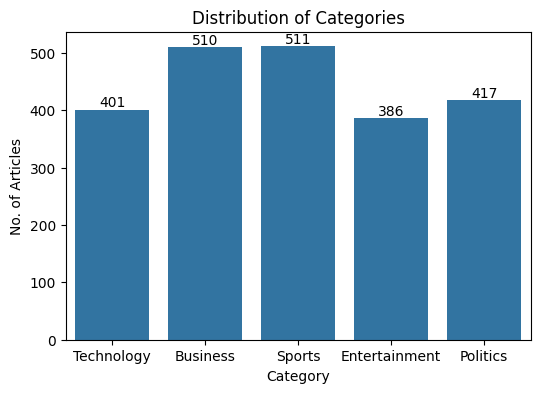

In [8]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x='Category',data=df)
ax.bar_label(ax.containers[0])

ax.set_title('Distribution of Categories')
ax.set_xlabel('Category')
ax.set_ylabel('No. of Articles')
plt.show()

In [9]:
df.describe()

,Category,Article
count,2225,2225
unique,5,2126
top,Sports,blind student hears in colour a blind studen...
freq,511,2


In [10]:
df.isnull().sum()

,0
Category,0
Article,0


In [11]:
df['Article'][0]

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

In [12]:
import re
import nltk

In [13]:
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [14]:
from nltk import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
stopwords=list(stopwords.words('english'))

In [16]:
def text_preprocess(article):

  text=re.sub(r'[^A-Za-z]+',' ',article)

  words=nltk.word_tokenize(text)

  filtered_text=[word for word in words if not word in stopwords]

  lemmatizer=WordNetLemmatizer()
  new_text=[lemmatizer.lemmatize(word) for word in filtered_text]
  new_text=" ".join(new_text)

  return new_text

In [17]:
df['Article']=df['Article'].apply(text_preprocess)

In [18]:
df['Article'][1]

'worldcom bos left book alone former worldcom bos bernie ebbers accused overseeing bn bn fraud never made accounting decision witness told juror david myers made comment questioning defence lawyer arguing mr ebbers responsible worldcom problem phone company collapsed prosecutor claim loss hidden protect firm share mr myers already pleaded guilty fraud assisting prosecutor monday defence lawyer reid weingarten tried distance client allegation cross examination asked mr myers ever knew mr ebbers make accounting decision aware mr myers replied ever know mr ebbers make accounting entry worldcom book mr weingarten pressed replied witness mr myers admitted ordered false accounting entry request former worldcom chief financial officer scott sullivan defence lawyer trying paint mr sullivan admitted fraud testify later trial mastermind behind worldcom accounting house card mr ebbers team meanwhile looking portray affable bos admission pe graduate economist whatever ability mr ebbers transformed

In [19]:
import category_encoders as ce

In [20]:
encode=ce.OrdinalEncoder(cols='Category')
df=encode.fit_transform(df)

In [21]:
df.head()

,Category,Article
0,1,tv future hand viewer home theatre system plas...
1,2,worldcom bos left book alone former worldcom b...
2,3,tiger wary farrell gamble leicester say rushed...
3,3,yeading face newcastle fa cup premiership side...
4,4,ocean twelve raid box office ocean twelve crim...


In [22]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [23]:
choice=int(input("Choose vectorization technique:\n 1: Bag of Words\n 2: TF-IDF\n Choice: "))

if choice==1:
  cv=CountVectorizer(max_features=5000)
  X=cv.fit_transform(df.Article).toarray()
  y=np.array(df['Category'].values)
  print('BOW vectorizer technique is used.')

elif choice==2:
  tf_idf=TfidfVectorizer()
  X=tf_idf.fit_transform(df.Article).toarray()
  y=np.array(df['Category'].values)
  print('Tfidf vectorizer technique is used.')

else:
  print('Wront Input!')


Choose vectorization technique:
 1: Bag of Words
 2: TF-IDF
 Choice: 2
Tfidf vectorizer technique is used.


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_val,y_train,y_val=train_test_split(X,y,random_state=42,stratify=y,test_size=0.25,shuffle=True)

In [26]:
X_train.shape

(1668, 24728)

In [27]:
X_val.shape

(557, 24728)

In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [29]:
from sklearn.metrics import roc_auc_score,f1_score,precision_score,recall_score,accuracy_score

In [30]:
from sklearn.metrics import confusion_matrix,classification_report

In [31]:
models_dict={
    'NB':MultinomialNB(),
    'RFC':RandomForestClassifier(),
    'KNC':KNeighborsClassifier(),
    'DTC':DecisionTreeClassifier()
    }



NB Model Training...
...................................
...................................

NB Model Training Completed.


Evaluating the NB model...


Train Accuracy for the NB model is 0.988
Test Accuracy for the NB model is 0.977

ROC AUC score for NB model is 0.999

Precision= 0.977
Fecall= 0.977
F1 score= 0.977


NB Model Evaluation Completed.


Confusion Matrix for the NB model:



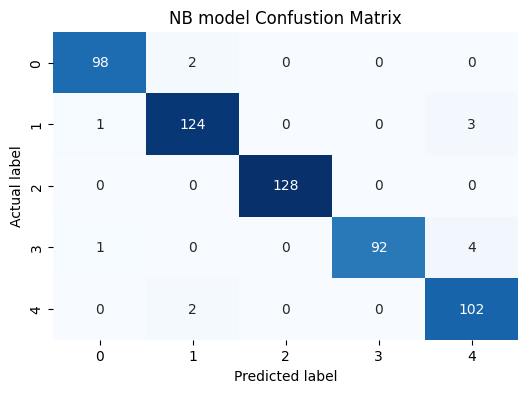



Classification Report for NB model:

              precision    recall  f1-score   support

           1       0.98      0.98      0.98       100
           2       0.97      0.97      0.97       128
           3       1.00      1.00      1.00       128
           4       1.00      0.95      0.97        97
           5       0.94      0.98      0.96       104

    accuracy                           0.98       557
   macro avg       0.98      0.98      0.98       557
weighted avg       0.98      0.98      0.98       557




RFC Model Training...
...................................
...................................

RFC Model Training Completed.


Evaluating the RFC model...


Train Accuracy for the RFC model is 1.000
Test Accuracy for the RFC model is 0.966

ROC AUC score for RFC model is 0.998

Precision= 0.966
Fecall= 0.966
F1 score= 0.966


RFC Model Evaluation Completed.


Confusion Matrix for the RFC model:



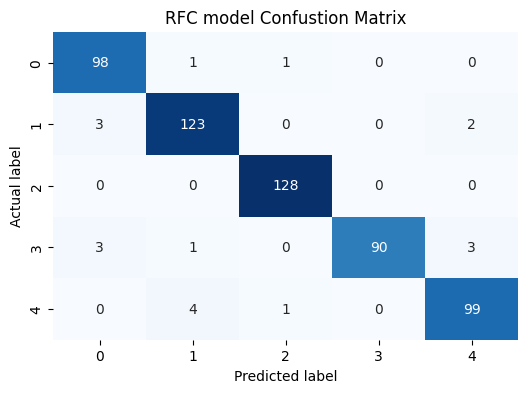



Classification Report for RFC model:

              precision    recall  f1-score   support

           1       0.94      0.98      0.96       100
           2       0.95      0.96      0.96       128
           3       0.98      1.00      0.99       128
           4       1.00      0.93      0.96        97
           5       0.95      0.95      0.95       104

    accuracy                           0.97       557
   macro avg       0.97      0.96      0.96       557
weighted avg       0.97      0.97      0.97       557




KNC Model Training...
...................................
...................................

KNC Model Training Completed.


Evaluating the KNC model...


Train Accuracy for the KNC model is 0.965
Test Accuracy for the KNC model is 0.934

ROC AUC score for KNC model is 0.988

Precision= 0.935
Fecall= 0.934
F1 score= 0.933


KNC Model Evaluation Completed.


Confusion Matrix for the KNC model:



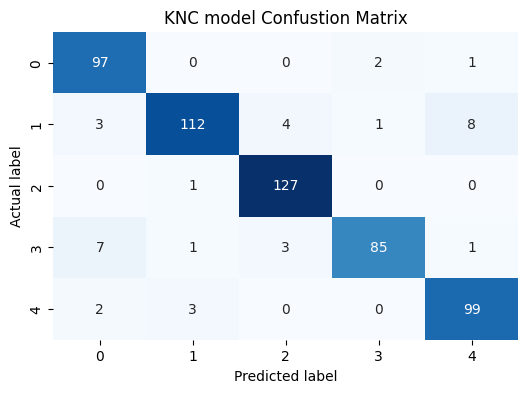



Classification Report for KNC model:

              precision    recall  f1-score   support

           1       0.89      0.97      0.93       100
           2       0.96      0.88      0.91       128
           3       0.95      0.99      0.97       128
           4       0.97      0.88      0.92        97
           5       0.91      0.95      0.93       104

    accuracy                           0.93       557
   macro avg       0.93      0.93      0.93       557
weighted avg       0.94      0.93      0.93       557




DTC Model Training...
...................................
...................................

DTC Model Training Completed.


Evaluating the DTC model...


Train Accuracy for the DTC model is 1.000
Test Accuracy for the DTC model is 0.860

ROC AUC score for DTC model is 0.911

Precision= 0.860
Fecall= 0.860
F1 score= 0.860


DTC Model Evaluation Completed.


Confusion Matrix for the DTC model:



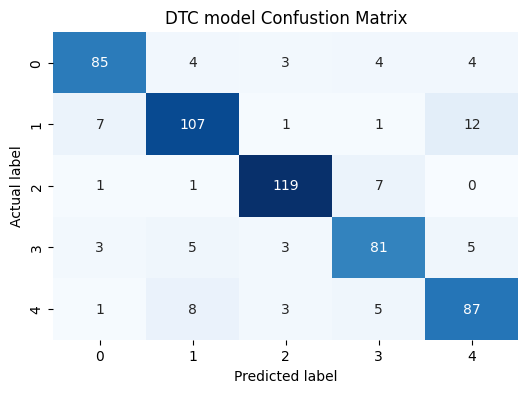



Classification Report for DTC model:

              precision    recall  f1-score   support

           1       0.88      0.85      0.86       100
           2       0.86      0.84      0.85       128
           3       0.92      0.93      0.93       128
           4       0.83      0.84      0.83        97
           5       0.81      0.84      0.82       104

    accuracy                           0.86       557
   macro avg       0.86      0.86      0.86       557
weighted avg       0.86      0.86      0.86       557




In [32]:
for model_name in models_dict:

  print(f'\n\n{model_name} Model Training...')
  print('.'*35)
  print('.'*35)
  model=models_dict[model_name]
  model.fit(X_train,y_train)
  y_pred=model.predict(X_val)
  y_pred_proba=model.predict_proba(X_val)
  print(f'\n{model_name} Model Training Completed.\n\n')

  print(f'Evaluating the {model_name} model...\n\n')

  train_accuracy=accuracy_score(y_train,model.predict(X_train))
  test_accuracy=accuracy_score(y_val,y_pred)
  print(f'Train Accuracy for the {model_name} model is {train_accuracy:.3f}')
  print(f'Test Accuracy for the {model_name} model is {test_accuracy:.3f}')

  ROC_AUC_score=roc_auc_score(y_val,y_pred_proba,multi_class='ovr')
  print(f'\nROC AUC score for {model_name} model is {ROC_AUC_score:.3f}')

  precision=precision_score(y_val,y_pred,average='weighted')
  recall=recall_score(y_val,y_pred,average='weighted')
  f1=f1_score(y_val,y_pred,average='weighted')
  print(f'\nPrecision= {precision:.3f}')
  print(f'Fecall= {recall:.3f}')
  print(f'F1 score= {f1:.3f}')

  print(f'\n\n{model_name} Model Evaluation Completed.\n\n')

  print(f'Confusion Matrix for the {model_name} model:\n')
  cm=confusion_matrix(y_val,y_pred)
  plt.figure(figsize=(6,4))
  sns.heatmap(cm,annot=True,fmt='d',cbar=False,cmap='Blues')
  plt.title(f'{model_name} model Confustion Matrix')
  plt.xlabel('Predicted label')
  plt.ylabel('Actual label')
  plt.show()

  print(f'\n\nClassification Report for {model_name} model:\n\n{classification_report(y_val,y_pred)}\n')

  print('='*70)